# Lecture 3 - Simple Linear Regression Lecture + Case Study

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)

Authored by [Daisy Wang]()

Today's lecture will be on Simple Linear Regression. We'll be covering the following:
- Transforming Data
- Linear Least Squares Regression
- Residuals and Residual Plots
- $ R^2 $

We will be using the World Happiness Report 2023 Data throughout the lecture which is loaded in below. Specifically we will be looking at the relationship between Social support, a variable that has numeric values given by the committee that comes up with the World Happiness Report, and the Ladder Score, which is the overall score of a country that ultimately determines their ranking in the World Happiness Report. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
happiness = pd.read_csv("WHR2023.csv")
happiness.head()

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250                         0.934       0.134   
2                   72.050                         0.936       0.211   
3                   72.697                         0.809      -0.023   
4                   71.550                         0.887       0.213   

   Perceptions of corruption  Ladder score in Dystopia  
0                      0.182                     1.778  
1                      0.196                     1.778  
2                      0.668                     1.778  
3                      0.708                     1.778  
4                      0.379                     1.778

## Transforming Data

Why do we need to transform our data? Well, a lot of times our data is not linear, which is quite necessary for our *LINEAR* regression models to make sense and be useful and interpretable. Additionally, we data scientists hate attributes of distribution like skew and outliers, so we often use transformations to make our data more symmetric and reduce the influence of outliers. We do this by applying transformations, which is usually a function that we use on at least one variable of our data to straighten out the relationship. These are all done to fulfill the assumptions we make when we do a linear regression model (we will talk about this in a second).\
\
For example, when we look at the scatterplot relationship between Social Support and Ladder Score we see that the data is not very linear and is very skewed, with a lot of data points clustered around 1.0. And very few clustered around .5 or below.

Text(0, 0.5, 'Ladder Score')

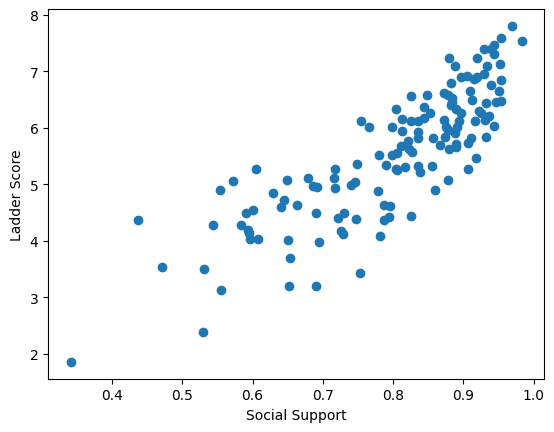

In [59]:
plt.scatter(x = happiness["Social support"], y=happiness["Ladder score"])
plt.xlabel('Social Support')
plt.ylabel('Ladder Score')

The way to resolve this is by applying a transformation. The simplest of transformations is to use the Tukey and Mosteller's Bulging rule where the direction of the bulge indicates what type of transformation you can use on X or Y to straighten the relationship.\
![TM Bulge](images/tukey_mostellar.png)

The set of transformations used in the Tukey Mosteller's bulge are known as "power transformation" and are particulary useful when all your values are positive or negative. However, when your values are not all positive or negative, you can add or subtract a value to all the data values and make them all positive or negative (aka shifting your data).\
\
As you can see, we because our scatterplot bulges towards the bottom right slight, we can apply the transformations $X^2$, $X^3$, $\sqrt{Y}$, or $log(Y)$ on our data. Doing so we can see that our scatterplot become more linear.

Text(0, 0.5, 'Log Ladder Score')

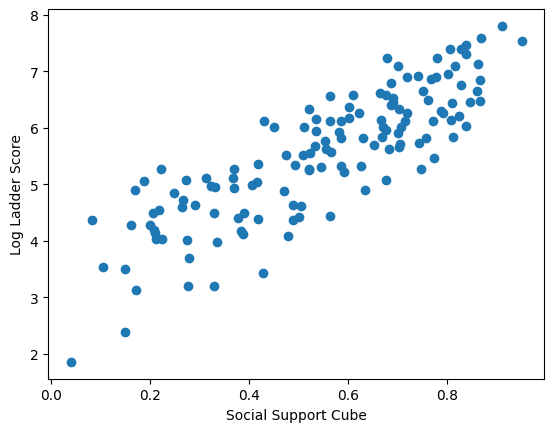

In [63]:
plt.scatter(x = happiness["Social support"]**3, y=happiness["Ladder score"])
#adding the cubed version to our data
happiness["Cubed_Social_support"] = happiness["Social support"]**3
plt.xlabel('Social Support Cube')
plt.ylabel('Log Ladder Score')

Other transformations that you can use, especially when dealing with proportions/probabilities as your data is the *logit* and *probit* transformations.
![logit](images/logit.png)![probit](images/probit.png)

## Linear Least-Squares Regression

Now lets talk about a linear regression model. The first thing to talk about is why a linear regression model? The main reason is interpretability and summarizing associations. As my professor once said,"if you want to predict something, don't use linear regression. Nowadays there are so many models out there that something else will definitely be better at prediction than linear models." You guys will learn all about other models later in the semester that are better for prediction. Additionally, if you are predicting with a linear model, you don't want to extrapolate beyong your data. However, when it comes to interpretability, linear regression is a lot easier to talk about because you can say, about how much will my dependent variable increase by if I increase the independent variable by one unit? You can also talk about how highly associated two variables are. \
\
Before doing simple linear regression, we make four assumptions:
1. Linear relationship: There exists a linear relationship between the independent variable and the dependent variable.

2. Independence: Our observations are independent (the residuals are independent)

3. Homoscedasticity: The residuals have constant variance at every level of x i.e. the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

4. Normality: The data is normally distributed (the residuals of the model are normal)


So, a straight line has the formula of $y = mx + b$ where $y$ is our dependent variable, $x$ is our indepenent variable, slope $m$ is our and $b$ is our y-intercept, aka when $x = 0$.

A simple linear regression model follows a similar equation. A simple linear regression model has the equation of:\
\
$Y_i = A + BX_i + E_i$

where $Y_i$ is the i-th dependent variable in your data set, $A$ is your intercept, $X_i$ is the coresponding i-th indepndent variable in your dataset, $B$ is our slope or coefficient and $E_i$ is the i-th error that cannot be accounted for purely with $Y_i = A + BX_i$, a value also known as the residual. \
\
Your linear regression model itself is going to be $\hat{Y}_i = A + BX_i$ so you can actually write $Y_i = \hat{Y}_i + E_i$ since $\hat{Y}_i$ is your predicted value for the i-th observation, otherwise known as a fitted value. \
\
Visually, please look at the diagram below.
![one-val](images/one_point.png)

A line that fits the data well therefore makes the residuals small, but if we were to only seek to minimize $\sum_{i=1}^{\infty} E_i $ we will run into the problem that large negative residual can cancel our large positive residuals (both of which are bad). \
\
Therefore when attempting to minimize our residuals, we data scientist and statisticians typically choose to minimize using the *least-squares criterion*. This means we find $A$ and $B$ such that $\sum_{i=1}^{\infty} E_i^2$ is minimized. To do this, we do a lovely thing called taking partial derivatives! Since $\sum_{i=1}^{\infty} E_i^2 = \sum (Y_i - A - BX_i)^2$ we can take the partial derivatives of the second equation with respect to A and B in order to find both A and B that minimizes the least-squared residuals. \
!["partials](images/partials.png)

Solving the equation after setting the two equations equal to 0, we result in the following: \
!["final equations"](images/final_equation.png)
\
Now in code you can either do this manually or with packages. I'll show both!

#### Manually

In [39]:
x_minus_mean = happiness["Cubed_Social_support"] - np.mean(happiness["Cubed_Social_support"]) 
B = sum(x_minus_mean * (happiness["Ladder score"] - np.mean(happiness["Ladder score"]))) / (sum(x_minus_mean**2))
A = np.mean(happiness["Ladder score"]) - B * np.mean(happiness["Cubed_Social_support"])
print("Our Regression Line is Y = " + str(A) + " + " + str(B)+" X")

Our Regression Line is Y = 3.1431213120992108 + 4.374374066590267 X


#### With the SKLEARN package

In [47]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(happiness[["Cubed_Social_support"]], happiness[["Ladder score"]])
print("Our Regression Line is Y = " + str(lm.intercept_[0]) + " + " + str(lm.coef_[0][0])+" X")

Our Regression Line is Y = 3.1431213120992116 + 4.374374066590265 X


They're the same! Now lets plot it.

Text(0, 0.5, 'Ladder Score')

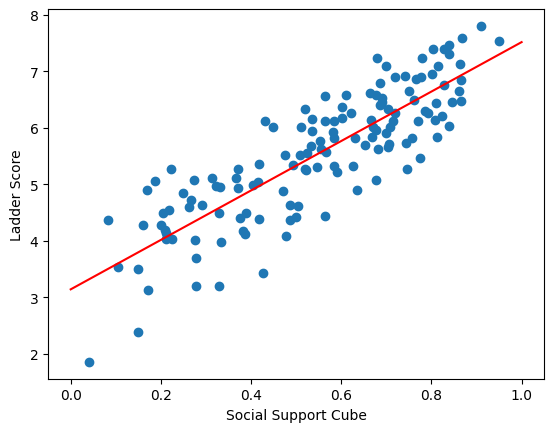

In [62]:
plt.scatter(x = happiness["Social support"]**3, y=happiness["Ladder score"])
x = np.array([0,1])
plt.plot(x, B*x+A, color = "red")
plt.xlabel('Social Support Cube')
plt.ylabel('Ladder Score')

## Residuals and Residual Plots

We've already talked briefly about residuals now lets look at the residual plots. A residual plot is a graph in which the residuals are displayed on the y axis and the independent variable is displayed on the x-axis. A linear regression model is appropriate if the dots in a residual plot are randomly distributed across the horizontal axis. 

<Axes: xlabel='Social support', ylabel='Ladder score'>

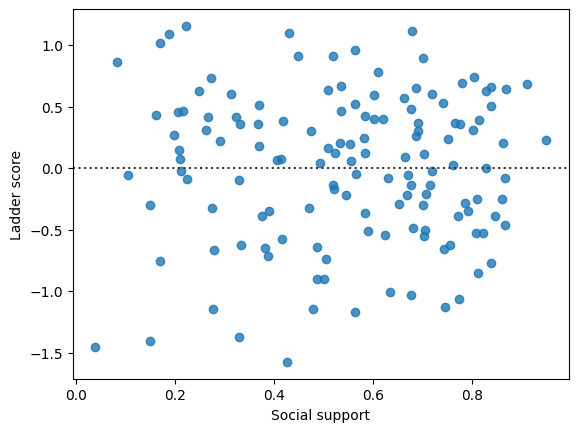

In [66]:
import seaborn as sns
sns.residplot(x = happiness["Social support"]**3, y=happiness["Ladder score"])


## R-Squared

From our data we can also calculate a few other attributes:\
Total Sum of Squares (TSS): $\sum E_i'^2 = \sum (Y_i - \bar{Y}_i)^2$\
Residual Sum of Squares (RSS): $\sum E_i^2 = \sum (Y_i - \hat{Y}_i)^2$\
Regression Sum of Squares (RegSS): $TSS - RSS$\
Regression sum of squares gives the reduction in squared error due to linear regression. The ratio between RegSS and TSS defines the square of the correlation coefficient, or r-squared:\
\
$r^2=RegSS/TSS$\
\
If there is a perfect positive linear relationship between $Y$ and $X$, then $r = 1$. A perfect negative linear relationship corresponds to $r = -1$. If there is no linear relationship between $Y$ and $X$ , then $RSS = TSS$, $RegSS = 0$, and $r = 0$. Between these extremes, $r$ gives the direction of the linear relationship between the two variables, and $r^2$ can be interpreted as the proportion of the total variation of $Y$ that is "captured" by its linear regression on $X$.\
![residuals_plot](images/residual_plots.png)

It is also possible to write the correlation coefficient as a function of standard deviation: \
We define sample covariance between $X$ and $Y$ as $S_{XY} = \sum (X_i - \bar{X})(Y_i - \bar{Y})/(n-1)$\
\
We then may write \
\
$r = S_{XY}/S_XS_Y = \sum (X_i - \bar{X})(Y_i - \bar{Y})/\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}$